In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-image-classification/data/cloudy/train_17406.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_28684.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_33597.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_34079.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_30586.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_18281.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_33296.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_34303.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_1336.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_30792.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_19000.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_13047.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_21750.jpg
/kaggle/input/satellite-image-classification/data/cl

In [ ]:
import pandas as pd
import os

# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes
labels = {'/kaggle/input/satellite-image-classification/data/cloudy' : 'Cloudy',
          '/kaggle/input/satellite-image-classification/data/desert' : 'Desert',
          '/kaggle/input/satellite-image-classification/data/green_area' : 'Green_Area',
          '/kaggle/input/satellite-image-classification/data/water' : 'Water',
           }

In [ ]:
# Loop over the train, test, and val folders and extract the image path and label
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)


/tmp/ipykernel_32/4085549277.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
/tmp/ipykernel_32/4085549277.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
/tmp/ipykernel_32/4085549277.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
/tmp/ipykernel_32/4085549277.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_inde

In [ ]:
# Save the data to a CSV file
data.to_csv('image_dataset.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Load the dataset
df = pd.read_csv("/kaggle/working/image_dataset.csv")

In [ ]:
df

,image_path,label
0,/kaggle/input/satellite-image-classification/d...,Cloudy
1,/kaggle/input/satellite-image-classification/d...,Cloudy
2,/kaggle/input/satellite-image-classification/d...,Cloudy
3,/kaggle/input/satellite-image-classification/d...,Cloudy
4,/kaggle/input/satellite-image-classification/d...,Cloudy
...,...,...
5626,/kaggle/input/satellite-image-classification/d...,Water
5627,/kaggle/input/satellite-image-classification/d...,Water
5628,/kaggle/input/satellite-image-classification/d...,Water
5629,/kaggle/input/satellite-image-classification/d...,Water


In [ ]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Pre-process the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [ ]:
# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator, epochs=5, validation_data=test_generator)

/tmp/ipykernel_32/1344171112.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5, validation_data=test_generator)


Epoch 1/5
141/141 [==============================] - 506s 4s/step - loss: 0.4800 - accuracy: 0.7629 - val_loss: 0.3841 - val_accuracy: 0.8208
Epoch 2/5
141/141 [==============================] - 511s 4s/step - loss: 0.4269 - accuracy: 0.8206 - val_loss: 0.3587 - val_accuracy: 0.8607
Epoch 3/5
141/141 [==============================] - 511s 4s/step - loss: 0.3872 - accuracy: 0.8433 - val_loss: 0.4062 - val_accuracy: 0.8101
Epoch 4/5
141/141 [==============================] - 511s 4s/step - loss: 0.3889 - accuracy: 0.8430 - val_loss: 0.2962 - val_accuracy: 0.8713
Epoch 5/5
141/141 [==============================] - 512s 4s/step - loss: 0.3454 - accuracy: 0.8615 - val_loss: 0.4451 - val_accuracy: 0.7799


In [ ]:
num_samples = test_df.shape[0]
num_samples

1127

In [ ]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

36/36 [==============================] - 27s 747ms/step - loss: 0.4451 - accuracy: 0.7799


In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7d1d1f8a6590>>

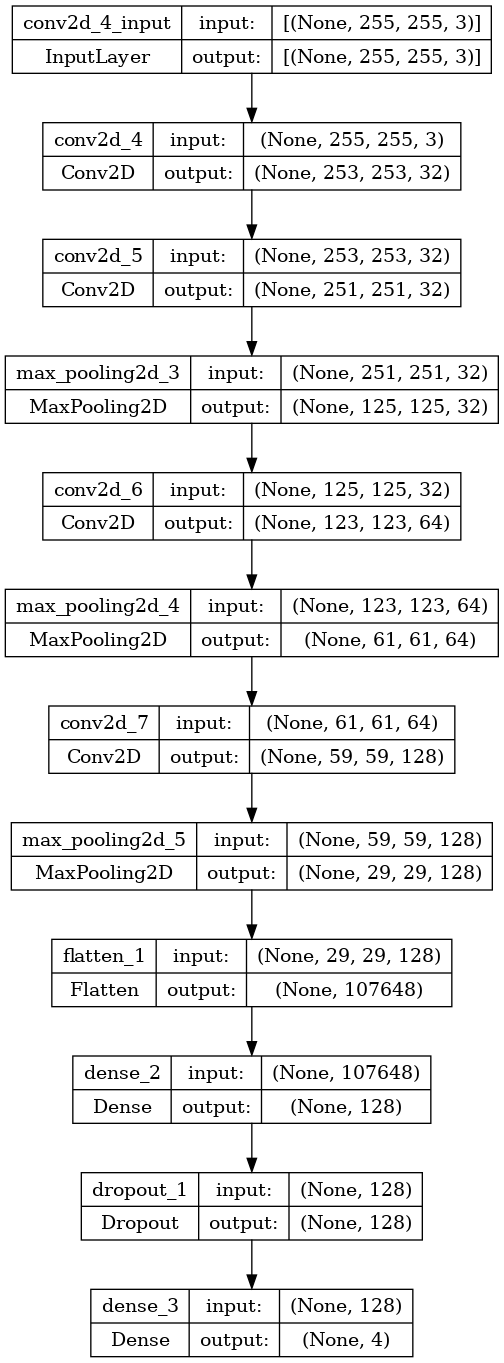

In [ ]:
from tensorflow.keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

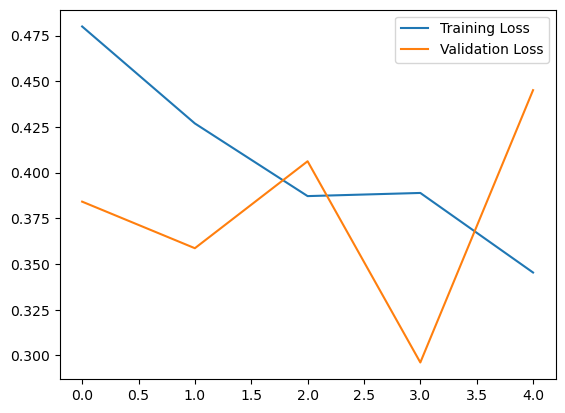

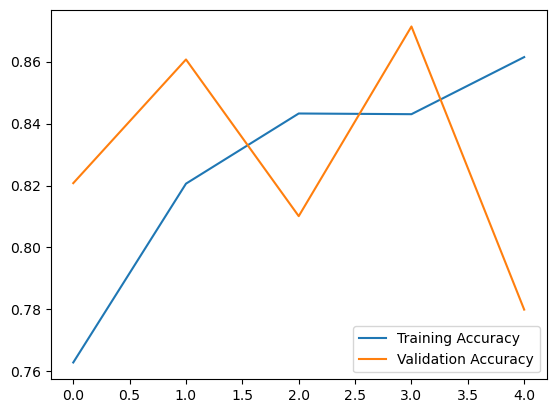

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Model.h5')

In [ ]:
# Load the model
model = load_model("Model.h5")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [ ]:
# Load an image from the test set
img = load_img("/kaggle/input/satellite-image-classification/data/green_area/Forest_1768.jpg", target_size=(255, 255))

In [ ]:
# Convert the image to an array
img_array = img_to_array(img)
img_array

array([[[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       ...,

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]]

In [ ]:
img_array.shape

(255, 255, 3)

In [ ]:
# Normalize the image pixel values to the range [0, 1]
img_array = img_array / 255.0
img_array

array([[[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       ...,

       [[0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0

In [ ]:
import numpy as np
img_array = np.reshape(img_array, (1, 255, 255, 3))

In [ ]:
# Get the model predictions
predictions = model.predict(img_array)

1/1 [==============================] - 0s 148ms/step


In [ ]:
# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_names[class_index]

print("The image is predicted to be '{}'.".format(predicted_label))

The image is predicted to be 'Green_Area'.


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
predictions = model.predict_generator(test_generator)

/tmp/ipykernel_32/2745777454.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


In [ ]:
predictions

array([[9.9899590e-01, 6.3943776e-04, 9.2757239e-07, 3.6383650e-04],
       [1.3301814e-03, 8.7058476e-07, 7.3884308e-01, 2.5982592e-01],
       [9.9883062e-01, 5.3285435e-04, 1.5805264e-06, 6.3500798e-04],
       ...,
       [1.9471196e-03, 9.9805295e-01, 2.5305869e-24, 8.2253231e-20],
       [9.9898773e-01, 7.3979923e-04, 7.2755637e-07, 2.7172192e-04],
       [3.7876827e-05, 3.8523133e-08, 1.5772277e-02, 9.8418981e-01]],
      dtype=float32)

In [ ]:
actual_labels = test_generator.classes

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([0, 2, 0, ..., 1, 0, 3])

In [ ]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [ ]:
print(cm)

[[ 97  77 109  45]
 [ 59  47  93  28]
 [ 80  57 100  47]
 [ 71  65 107  45]]


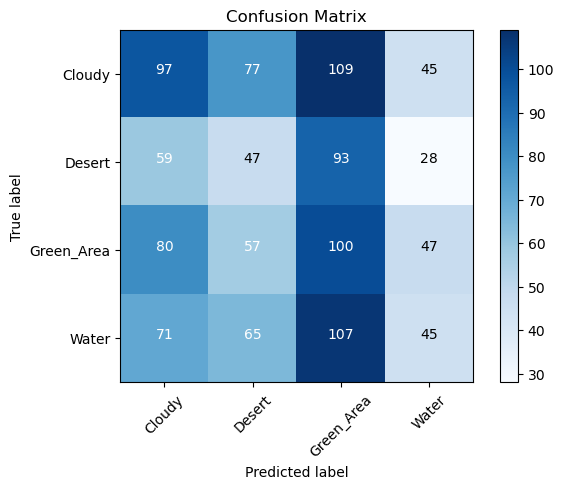

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Confusion matrix


# Plot the confusion matrix as an image
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add the class labels to the plot
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values to the plot
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()